# Analyzing Customer Reviews from Amazon

### Analysis of the data and Rating prediction

The purpose of this project is to analyze customer reviews of different headphones listings on Amazon. The reviews will be split into "good" and "bad" sets, and the review texts will be processed into tokens consisting of individual words. These will form the "good" and "bad" review corpuses that will be analyzed to determine the most important words in either good and bad review sets. They will also be used to predict if a review will be "good" or "bad."

This analysis has many real-world applications. While customers can manually include ratings for the product in their reviews, this rating is only an overall statement

In [1]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.1"

$year
[1] "2019"

$month
[1] "07"

$day
[1] "05"

$`svn rev`
[1] "76782"

$language
[1] "R"

$version.string
[1] "R version 3.6.1 (2019-07-05)"

$nickname
[1] "Action of the Toes"

In [2]:
### Installation of packages

# tm: Text mining packge
# SnowballC: Stopwords dictionary
# ggplot2: Plotting data
# wordcloud: Making word clouds from the data
# RColorBrewer: Additional color palettes for plots
# e1071: SVM modeling

install.packages('tm')
install.packages('SnowballC')
install.packages("vctrs", type = "binary", dependencies = TRUE, repos = "https://cloud.r-project.org")
install.packages("ggplot2",
                 type = "binary",
                 dependencies = TRUE,
                 repos = "https://cloud.r-project.org")
install.packages('wordcloud')
install.packages('RColorBrewer')
install.packages('e1071')




  There is a binary version available but the source version is later:
   binary source needs_compilation
tm  0.7-8  0.7-9              TRUE

  Binaries will be installed
package 'tm' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tm'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\tm\libs\x64\tm.dll to C:\Users\johnt\anaconda3\Lib\R\library\tm\libs\x64\tm.dll: Permission denied"Warning message:
"restored 'tm'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\Rtmpm8K4VS\downloaded_packages
package 'SnowballC' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'SnowballC'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\SnowballC\libs\x64\SnowballC.dll to C:\Users\johnt\anaconda3\Lib\R\library\SnowballC\libs\x64\SnowballC.dll: Permission denied"Warning message:
"restored 'SnowballC'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\Rtmpm8K4VS\downloaded_packages

  There is a binary version available (and will be installed) but the
  source version is later:
      binary source
vctrs  0.3.8  0.4.2

package 'vctrs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'vctrs'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\vctrs\libs\x64\vctrs.dll to C:\Users\johnt\anaconda3\Lib\R\library\vctrs\libs\x64\vctrs.dll: Permission denied"Warning message:
"restored 'vctrs'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\Rtmpm8K4VS\downloaded_packages

  There is a binary version available (and will be installed) but the
  source version is later:
        binary source
ggplot2  3.3.3  3.3.6

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\Rtmpm8K4VS\downloaded_packages
package 'wordcloud' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'wordcloud'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\wordcloud\libs\x64\wordcloud.dll to C:\Users\johnt\anaconda3\Lib\R\library\wordcloud\libs\x64\wordcloud.dll: Permission denied"Warning message:
"restored 'wordcloud'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\Rtmpm8K4VS\downloaded_packages

  There is a binary version available but the source version is later:
             binary source needs_compilation
RColorBrewer  1.1-2  1.1-3             FALSE



installing the source package 'RColorBrewer'




  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6 1.7-11              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\e1071\libs\x64\e1071.dll to C:\Users\johnt\anaconda3\Lib\R\library\e1071\libs\x64\e1071.dll: Permission denied"Warning message:
"restored 'e1071'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\Rtmpm8K4VS\downloaded_packages

  There is a binary version available (and will be installed) but the
  source version is later:
      binary source
dplyr  1.0.6 1.0.10

package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\johnt\anaconda3\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\Rtmpm8K4VS\downloaded_packages


In [3]:
library(tm)
library(SnowballC)
library(ggplot2)
library(wordcloud)
library(RColorBrewer)
library(e1071)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"Warning message:
"package 'SnowballC' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate

Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
### Importing the review dataset

df_data = read.csv("AllProductReviews.csv", encoding = 'UTF-8')

n_reviews = nrow(df_data)

cat('Number of columns:', length(df_data), '\n')
cat('Number of rows:', n_reviews)

head(df_data)

Number of columns: 4 
Number of rows: 14337

ReviewTitle,ReviewBody,ReviewStar,Product
Honest review of an edm music lover,No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.,3,boAt Rockerz 255
Unreliable earphones with high cost,"This earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying<U+200B> this unreliable product.Thanks.",1,boAt Rockerz 255
Really good and durable.,"i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop and mobile both.when listening muaic on Lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.Battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. So Battery life is pretty awesome.Comfortable on ear.",4,boAt Rockerz 255
stopped working in just 14 days,Its sound quality is adorable. overall it was good but just for 2 weeks after that it stopped working and since then it never powered on again. I am claiming for warrenty and it is still undergoing.,1,boAt Rockerz 255
Just Awesome Wireless Headphone under 1000...<U+0001F609>,Its Awesome... Good sound quality & 8-9 hrs battery life... Just waww look... <U+0001F609> I brought just 999 rupees...But Amazon's Packageing system is Very bad... Very poor packaging... Flipcart's packaging system is much better than Amazon...,5,boAt Rockerz 255
Charging port not working,"After 11 days, the charging port isn't working and now I can't even return it. Wat to do ?? I know there is one year warranty but it is only been 11 days. C'mon boat, please send me new one.",1,boAt Rockerz 255


### To facilitate easier processing, I will assign good reviews to '1' and bad reviews to '0'

Number of 1 star reviews: 2493 
Number of 2 star reviews: 939 
Number of 3 star reviews: 1503 
Number of 4 star reviews: 3189 
Number of 5 star reviews: 6213 


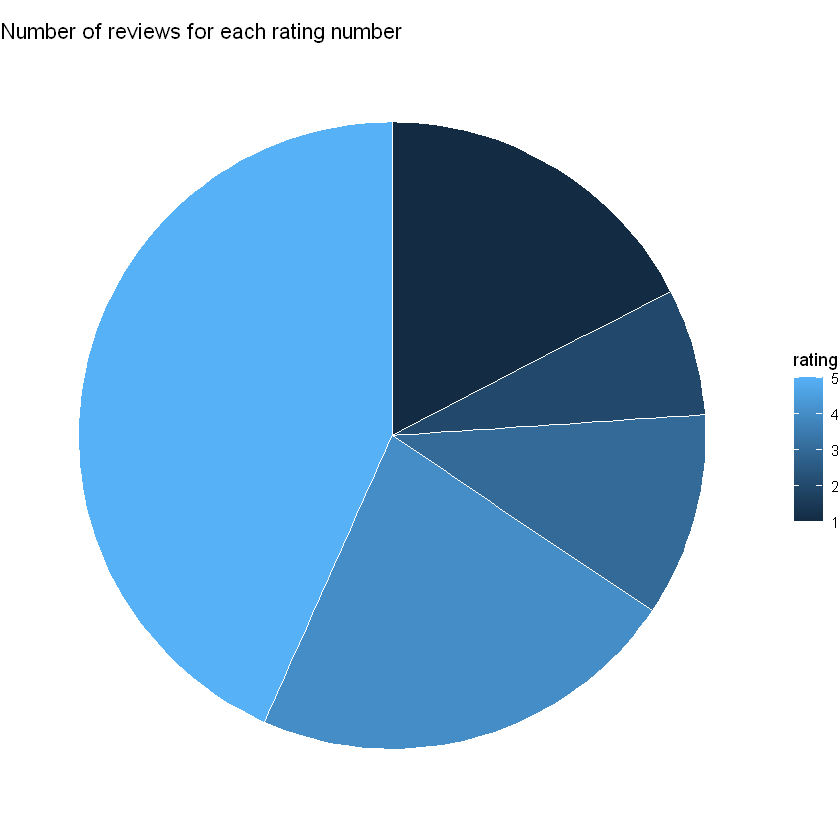

In [5]:
### View the number of reviews from each rating

rating = c(1,2,3,4,5)  # Amazon uses a 5 star rating system
ratingnum = c()

for (i in rating) {
    # Loop through rating values and add number of reviews for that value to ratingnum
    ratingnum = c(ratingnum, length(df_data[df_data$ReviewStar == i, 3]) )
    
    # Print the number
    cat('Number of', i, 'star reviews:', ratingnum[i], '\n')
}

# Convert to a dataframe
ratingdata = data.frame(rating = rating, ratingnum = ratingnum)

# Plot in a bar chart
ggplot(ratingdata, aes(x = '', y = ratingnum, fill = rating, color = rating)) +
  geom_bar(stat = 'identity', color = 'white') +
  coord_polar('y') +
  theme_void() +
  ggtitle('Number of reviews for each rating number')

In [6]:
# Combined: Column that combines the ReviewTitle and ReviewBody contents
df_data$Combined = paste(df_data[[1]], df_data[[2]])

## Binning the reviews into categories and merging title/body text

The number of 5 star reviews is larger than the number of 1, 2, and 3 star reviews combined - the number of 2 star reviews doesn't even break 1000. The data is thus skewed, and if machine learning algorithms are run with the current 5 categories, it would likely be innaccurate.

From a business's perspective, though, customer satisfaction is key - any rating lower than perfect can be considered bad. If the customer left a low rating, they were unsatisfied with something, and discovering these issues is important for guiding product development.

I will create two class bins - "good" reviews consisting of 4/5 star reviews, and "bad" reviews consisting of all others (1-3 star reviews). This is technically still skewed toward the good review category, but this is a fairly accurate representation of sentiment - a 4 star rating or better would typically be considered good on a 5 star spectrum.

I will also merge the title with the body into a single text block - this is because the title acts as a summarized version of the review where the most important criticism is noted.

In [7]:
### For the SVM analysis, it will be easier to work with 0 (bad review) and 1 (good review)

# Make a copy of the original DF to avoid any errors
df_data2 = df_data

# good review = rating >=4
# bad review = rating < 4
cutoff = 4

### Changing labels for the SVM analysis
df_data2[ df_data2$ReviewStar < cutoff, 'class'] = 'bad'
df_data2[ df_data2$ReviewStar >= cutoff, 'class'] = 'good'

head(df_data2, 3)

ReviewTitle,ReviewBody,ReviewStar,Product,Combined,class
Honest review of an edm music lover,No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.,3,boAt Rockerz 255,Honest review of an edm music lover No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.,bad
Unreliable earphones with high cost,"This earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying<U+200B> this unreliable product.Thanks.",1,boAt Rockerz 255,"Unreliable earphones with high cost This earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying<U+200B> this unreliable product.Thanks.",bad
Really good and durable.,"i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop and mobile both.when listening muaic on Lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.Battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. So Battery life is pretty awesome.Comfortable on ear.",4,boAt Rockerz 255,"Really good and durable. i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop and mobile both.when listening muaic on Lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.Battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. So Battery life is pretty awesome.Comfortable on ear.",good


Number of good reviews:  9402 
Number of bad reviews:  4935 


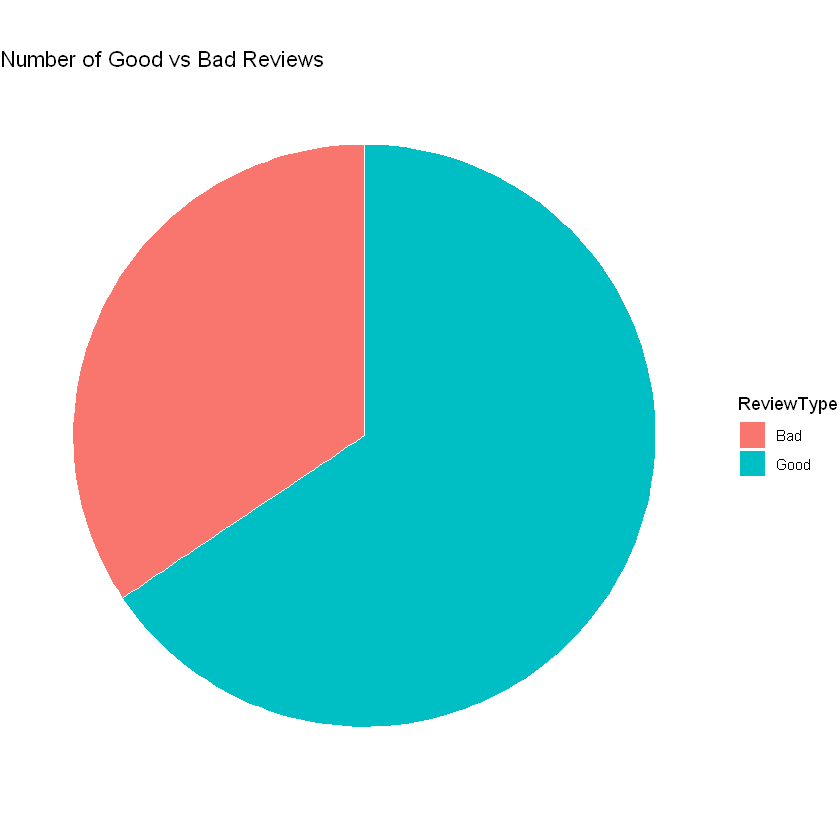

In [8]:
### Split data into good and bad reviews

df_good = df_data2[ df_data2$class == 'good', 'Combined']
df_bad = df_data2[ df_data2$class == 'bad', 'Combined']

cat('Number of good reviews: ', length(df_good), '\n')
cat('Number of bad reviews: ', length(df_bad), '\n')

pie_data = data.frame(num = c(length(df_good), length(df_bad)), ReviewType = c('Good', 'Bad'))

ggplot(pie_data, aes(x = '', y = num, fill = ReviewType )) +
  geom_bar(stat = 'identity', color = 'white') +
  coord_polar('y') +
  theme_void() +
  ggtitle('Number of Good vs Bad Reviews')

## Useful functions for building the corpus

In [9]:
################################ Create a function that will perform preprocessing required for building the corpus

build_corpus = function(vec, myStopWords) {
  ### Build a preprocessing function to build a word corpus
  ### Input: A vector containing all documents, a vector containing stopwords
  ### Output: A word corpus with all preprocessing steps completed
  # Tasks:
  # Create the corpus
  # Strip most/all punctuation
  # Split corpus into individual words and save to own variable
  # Convert to all lowercase
  # Delete all stop words - find an existing list and add anything
  # Stem
  ### Check the stems
  # Set min/max limits
  # Delete numbers (can be ratings, price, product number, date; probably not useful)
  
  ### Create the corpus
  vec_corp = VCorpus(VectorSource(vec))
    
  ### Convert to ASCII
  ### This is a temporary fix to remove emojis
  vec_corp = tm_map(vec_corp, content_transformer(iconv), to='ASCII', sub='')
  
  # Remove general punctuation
  # Replace ',' '.' '/' with spaces first to avoid accidental word merges (ex: good.You --> goodYou)
  vec_corp = tm_map(vec_corp, content_transformer(gsub), pattern = ',', replacement = ' ')
  vec_corp = tm_map(vec_corp, content_transformer(gsub), pattern = '\\.', replacement = ' ')
  vec_corp = tm_map(vec_corp, content_transformer(gsub), pattern = '\\/', replacement = ' ')
  vec_corp = tm_map(vec_corp, removePunctuation)
  
  ### Remove numbers
  vec_corp = tm_map(vec_corp, removeNumbers)
  
  ### Convert to lower case
  vec_corp = tm_map(vec_corp, content_transformer(tolower))
  
  ### Remove stopwords
  vec_corp = tm_map(vec_corp, removeWords, tolower(myStopWords))
  
  ### Perform stemming
  vec_corp = tm_map(vec_corp, stemDocument)
  
  ### Eliminate extra whitespaces
  vec_corp = tm_map(vec_corp, stripWhitespace)
  
  return(vec_corp)
}

######################################## Create a function that will build the corpus

build_dtm = function(vec, 
                     stopWords, 
                     controls = list(weighting = weightTf, 
                                     bounds = list(global = c(50, Inf)), 
                                     wordLengths = c(3, 15),
                                     normalize = FALSE),
                     sparse_threshold = -1) {
    ### Build a preprocessing function to build a word corpus
    ### Input: A vector containing all documents, a vector containing stopwords
    ### Output: A word corpus with all preprocessing steps completed
    
    temp_corp = build_corpus(vec, stopWords)
    temp_corp = DocumentTermMatrix(temp_corp, control = controls)
    if (sparse_threshold > 0) {
        temp_corp = removeSparseTerms(temp_corp, sparse_threshold)
    }
    
    
    return(temp_corp)
}

In [10]:
# Create a list of stopwords to delete

# Delete product names (derived from the original data)
products = c(unique(df_data$Product), tolower(unique(df_data$Product)))

# Add any custom terms that may appear often in reviews
#custom = c('u', 'ur', 'headphone', 'headphones', 'earphone', 'earphones')

# Words pertaining to quality
# quality = c('good', 'nice', 'best', 'bad', 'worst', 'excellent', 'great', 'superb', 'superior', 'super', 'worth', 'ok', 
#            'better', 'fine', 'perfect', 'cheap', 'awful', 'poor', 'not good', 'worse', 'substandard', 'adequate', 
#            'inadequate', 'terrible', 'satisfactory', 'unsatistfactory', 'unacceptable', 'inferior', 'awesome', 'like',
#            'love', 'hate', '')

# Create the stopwords list
myStopWords = c(stopwords('en'), products)
# Exceptions from the stopwords list
myStopWords = myStopWords[(myStopWords != 'not') & (myStopWords != 'no')]

## Building a corpus for good and bad reviews

In [11]:
# Build the corpus
controls = list(weighting = weightTf, 
                bounds = list(global = c(1, Inf)), 
                wordLengths = c(3, 15), 
                normalize = FALSE)
sparse_threshold = .98

#temp: DTM format
#df: TF counts
good_dtm = data.frame(as.matrix(build_dtm(df_good, myStopWords, controls, sparse_threshold)))
good_tf = data.frame(terms = names(colSums(good_dtm)), count = colSums(good_dtm))

bad_dtm = data.frame(as.matrix(build_dtm(df_bad, myStopWords, controls, sparse_threshold)))
bad_tf = data.frame(terms = names(colSums(bad_dtm)), count = colSums(bad_dtm))

Number of common words in the good reviews:  115

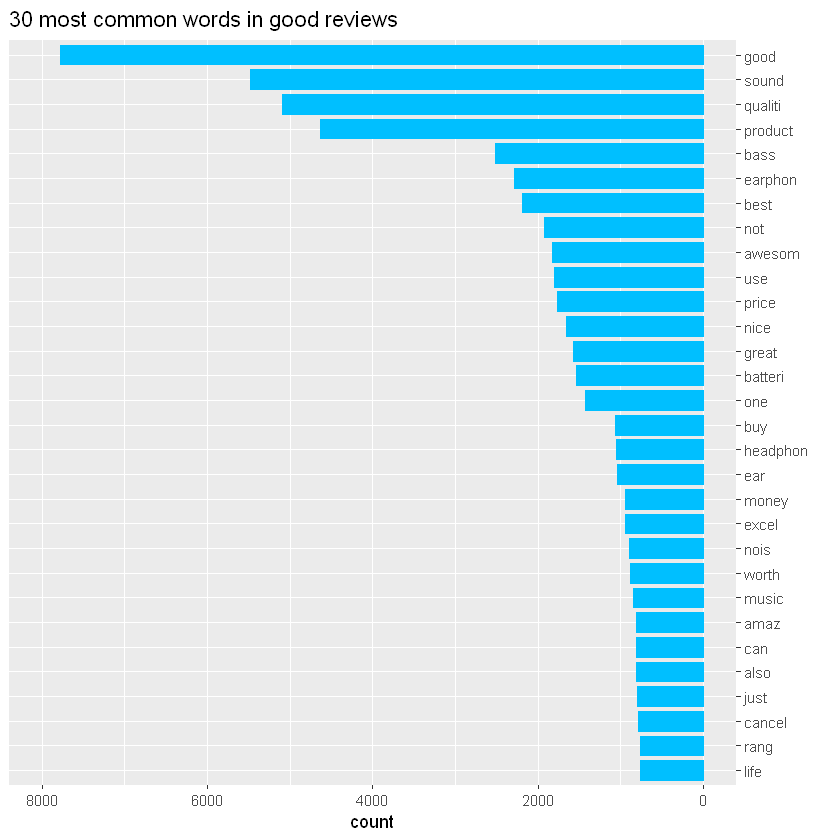

In [12]:
# View the most common words in the good reviews
cat('Number of common words in the good reviews: ', nrow(good_tf))

ggplot( data = head(good_tf[order(-good_tf$count),], 30), aes(reorder(terms, count), count)) +
    geom_col(color = 'deepskyblue', fill = 'deepskyblue' , width = .8) +
    labs(title = '30 most common words in good reviews') +
    coord_flip() +
    scale_x_discrete(name = "", position = "top") +
    scale_y_reverse(limits = c(8000, 0), position = "left")


Number of common words in the bad reviews:  142

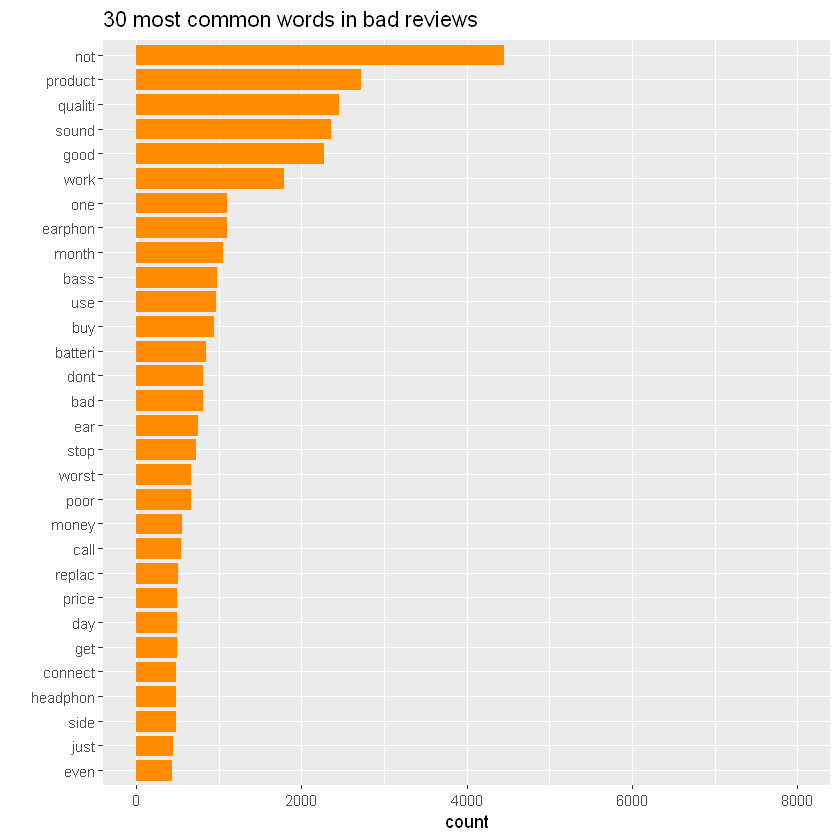

In [13]:
# View the most common words in the good reviews
cat('Number of common words in the bad reviews: ', nrow(bad_tf))

ggplot( data = head(bad_tf[order(-bad_tf$count),], 30), aes(reorder(terms, count), count)) +
    geom_col(color = 'darkorange', fill = 'darkorange' , width = .8) +
    labs(title = '30 most common words in bad reviews') +
    scale_x_discrete(name = "") + 
    ylim(0, 8000) + 
    coord_flip()

###  Conclusions from the initial analysis of good/bad reviews

The most notable finding is that the top four terms in the good review set are the 2nd-5th terms in the bad review set (excluding the top term, "not"). "Good" ranks very highly on the bad review set, which is fairly counterintuitive. My theory is that since only individual tokens are used (instead of using n-grams), some of these terms are taken out of context - good may actually be "not good". Another theory is that because these reviews are on a scale from 1-5, the content of the review may be both positive and negative, especially in the middle of the scale. This leads to many terms being shared between the sets.

Another interesting conclusion is how there are more important words in the bad review set than there are in the good review set (138 vs 114). Considering how the bad review set included only 34.4% of the total reviews, I would have expected fewer words in the bad review DTM.

One possible explanation is that people tend to be more comprehensive when leaving bad reviews
* Many good reviews focus on customer sentiment

>'Just go for it\n **Awesome best budget** wireless earphones\n'

>'**SUPERB**\n **Sound quality is good**. noise cancellation is not upto the mark. **battery quality is decent**. by charging it once you can enjoy upto 5hrs of music without any issue\n'
* Bad reviews are often more detailed to emphasize discontent

>'Honest review of an edm music lover\n No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following **dissapointed** me though i tried a lot to adjust.1.**Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic**. Other person keeps complaining about my voice.\n'

>'Review update - **Product failed after a few months**\n Update: Sadly this is the **second Boat product to conk off after few months of use**. I guess this is the end of the journey for you and I Boat Audio, **not buying any more products from your brand**. Changed the rating to reflect the same.I was in the market for a cheap pair of Bluetooth earphones and I chanced upon this on a lightning deal and bought it. I have used Boat products before, they have good build quality and their sound is alright. I’m writing this after a month or so, enough time to have lived with it and get to know quirks and other problems.• **The sound is nothing great**, it’s a bit on the bassy side. If you’re a bass lover, this is definitely a good buy.• Connectivity is quick and painless – and it works without hassle every time. **The quality of the connectivity depends and is sometimes weird**. I can put the phone on charge and use it for a distance of about 3 meters, no worries. But sometimes when I’m walking really fast or jogging there are breaks and crackles in audio. Not sure if it’s the material of my gym wear, but it works well when the phone’s in my jeans.• **Battery life is nothing to write home about** – I listen to music constantly even when I’m at work. My demands are probably too high for this price range.• It is sweat-proof as advertised. No interruptions under a light drizzle.• It’s got great build quality for the price – looks and feels premium. Doesn’t tangle at all.• It stays in your ear regardless of the intensity of the exercise which is great.On the whole a great buy if you are looking for a cheaper alternative. Wait for a sale before you get it though.Like my reviews? Please do click the helpful button. It encourages me to share more about the products I use. Thanks!\n'
        

### Adjusting the weights according to importance in good/bad reviews

To lessen the influence of shared terms, I decided to implement a custom scheme that mirrors term frequency - inverse document frequency (TF-IDF). TF-IDF is a combination of two separate methods. Term frequency is just the frequency that a term occurs in a document (if normalized, then it is also divided by the number of terms in the document). Inverse document frequency measures the importance of a term by taking the natural log of the total number of documents divided by the number of documents with a given term in it.

TFIDF = Num occurences of a term in a document * ln( {Total num documents} / {Num documents containing the term} )

$$Weight_{new} = Weight * \frac{Weight}{Total}$$

For my variation, first, I will build a separate DTM for both the good and bad review sets (gDTM, bDTM). I will then calculate the term frequencies for every term that appears in either set (g_TF, b_TF), as well as the inverse document frequency within either set (g_idf, b_idf). I will then extract all terms that are shared between the two review sets (inboth_df).

Then, for every term contained within inboth_df, I will multiply the TF from both sets with the IDF from the opposite set. Any term that is not contained within inboth_df will be multiplied by the default IDF (where number of documents containing the term = 1, to avoid division by 0)

$$idf\_count_{good\_reviews} = Good\_TF * Bad\_IDF$$
$$idf\_count_{bad\_reviews} = Bad\_TF * Good\_IDF$$

Taking "good" for example:

|Term  |Good TF     |Bad  TF     |TF Total     |Good IDF    |Bad  IDF    |
|:----:|----:       |----:       |----:        |----:       |----:       |
|good  |7869        |2273        |10142        |0.6551626   |1.142097    |

Given these, values the custom TF-IDF (idf_count) values will be:

$$idf\_count_{good\_reviews} = 7869 * 0.6551626 = 8989.449$$
$$idf\_count_{bad\_reviews} = 2273 * 0.6551626 = 1489.185$$

Taking "stop" for example (which is not represented in the good review set)

|Term  |Bad  TF     |TF Total     |Good IDF    |
|:----:|----:       |----:        |----:       |
|stop  |713         |713          |N/A         |

Since "stop" is not in the good review set, I will take the default good IDF value:

$$Default\_Good\_IDF = \ln{\dfrac{\# Good Reviews}{1}} = \ln{\dfrac{9402}{1}} = 9.1486777$$

$$idf\_count_{bad\_reviews} = 713 * 5.370638 = 6523.007$$


For reference, these are the calculated default IDF values

|Default Good IDF |Default Bad IDF |
|----:            |----:           |
|9.1486777        |8.5041080             |



## Qualities of a good indicator

* High overall TF in DTM1 (avg count)
* High overall DF in DTM1 (colSums(dtm1))
* Low overall TF in DTM2 (tf2_count)
* Low overall DF in DTM2 (colSums(dtm2))

In [55]:
# Creating a function that will implement the weighting scheme

col_scaler = function(vec, col_scale = c(1, 100)) {
    # scale a vector between max and min
    
    max_val = col_scale[2]
    min_val = col_scale[1]
    scaled_vec = ( min_val + (max_val - min_val) * ((vec - min(vec)) / (max(vec) - min(vec))) )
    
    return(scaled_vec)
    
    }
    

custom_tfdf = function(dtm1, dtm2, class_col = '', output_scale = c(1, 100), diff_weight = 1, normByDocLength = FALSE) {
    # Implements custom tfdf where terms are weighted according to term frequency and doc frequency
    
    # Get dfs/tfs for each df and insert into tf
    # Initialize defaults for non-shared terms
    if (class_col != '') {
        dtm1_class_col = dtm1[class_col]
        dtm2_class_col = dtm2[class_col]
        dtm1 = subset(dtm1, select = -c(class_col))
        dtm2 = subset(dtm2, select = -c(class_col))
        }
    
    if (normByDocLength == TRUE) {
        dtm1 = sweep(dtm1, MARGIN = 1, STATS = rowSums(dtm1) + 1, FUN = '/')
        dtm2 = sweep(dtm2, MARGIN = 1, STATS = rowSums(dtm2) + 1, FUN = '/')
        }

    tf1 = data.frame(terms = names(dtm1), 
                     avg_count = colMeans(dtm1), 
                     tot_count = colSums(dtm1),
                     doc_freq = colSums(dtm1 != 0),
                     tf1_higherFreq = 1,
                     tf2_avg_count = 1,
                     tf2_tot_count = 1,
                     tf2_doc_freq = 1,
                     stringsAsFactors = FALSE)
    tf2 = data.frame(terms = names(dtm2), 
                     avg_count = colMeans(dtm2), 
                     tot_count = colSums(dtm2),
                     doc_freq = colSums(dtm2 != 0),
                     tf2_higherFreq = 1,
                     tf1_avg_count = 1,
                     tf1_tot_count = 1,
                     tf1_doc_freq = 1,
                     stringsAsFactors = FALSE)
    union_tf = data.frame(terms = union(tf1$terms, tf2$terms), 
                          tf1_avg_count = 1, 
                          tf1_tot_count = 1,
                          tf1_doc_freq = 1,
                          tf2_avg_count = 1,
                          tf2_tot_count = 1,
                          tf2_doc_freq = 1,
                          stringsAsFactors = FALSE)


    # Find shared terms
    in_both = intersect(tf1$terms, tf2$terms)
    # Get doc freqs and counts for shared terms
    tf1_doc_freq = tf1[tf1$terms %in% in_both, 'doc_freq']
    tf1_avg_count = tf1[tf1$terms %in% in_both, 'avg_count']
    tf1_tot_count = tf1[tf1$terms %in% in_both, 'tot_count']
    tf2_doc_freq = tf2[tf2$terms %in% in_both, 'doc_freq']
    tf2_avg_count = tf2[tf2$terms %in% in_both, 'avg_count']
    tf2_tot_count = tf2[tf2$terms %in% in_both, 'tot_count']
    # Update union_tf with shared values
    union_tf[union_tf$terms %in% intersect(union_tf$terms, tf1$terms), c('tf1_avg_count', 'tf1_tot_count', 'tf1_doc_freq')] = list(tf1$avg_count, tf1$tot_count, tf1$doc_freq)
    union_tf[union_tf$terms %in% intersect(union_tf$terms, tf2$terms), c('tf2_avg_count', 'tf2_tot_count', 'tf2_doc_freq')] = list(tf2$avg_count, tf2$tot_count, tf2$doc_freq)
    tf1_higherFreq_cond = union_tf$tf1_avg_count * union_tf$tf1_tot_count * union_tf$tf1_doc_freq > nrow(dtm1) * union_tf$tf2_avg_count * union_tf$tf2_tot_count * union_tf$tf2_doc_freq
    tf2_higherFreq_cond = union_tf$tf2_avg_count * union_tf$tf2_tot_count * union_tf$tf2_doc_freq > nrow(dtm2) * union_tf$tf1_avg_count * union_tf$tf1_tot_count * union_tf$tf1_doc_freq
    union_tf1_higherFreq = union_tf[tf1_higherFreq_cond, 'terms']
    union_tf2_higherFreq = union_tf[tf2_higherFreq_cond, 'terms']
    # Update tf1 and tf2 with shared values
    tf1[tf1$terms %in% in_both, c('tf1_higherFreq', 'tf2_avg_count', 'tf2_tot_count', 'tf2_doc_freq')] = list(0, tf2_avg_count, tf2_tot_count, tf2_doc_freq) 
    tf1[(tf1$avg_count * tf1$tot_count * tf1$doc_freq > tf1$tf2_avg_count * tf1$tf2_tot_count * tf1$tf2_doc_freq), 'tf1_higherFreq'] = 1
    tf2[tf2$terms %in% in_both, c('tf2_higherFreq', 'tf1_avg_count', 'tf1_tot_count', 'tf1_doc_freq')] = list(0, tf1_avg_count, tf1_tot_count, tf1_doc_freq)
    tf2[(tf2$avg_count * tf2$tot_count * tf2$doc_freq > tf2$tf1_avg_count * tf2$tf1_tot_count * tf2$tf1_doc_freq), 'tf2_higherFreq'] = 1
    # Update the higherFreq columns to be factors
    tf1$tf1_higherFreq = as.factor(tf1$tf1_higherFreq)
    tf2$tf2_higherFreq = as.factor(tf2$tf2_higherFreq)
    
    # Term weighting
    # tf1['weight'] = (tf1$doc_freq / nrow(dtm1)) / (tf1$tf2_avg_count * tf1$tf2_doc_freq + 1) * (tf1$tot_count / nrow(dtm1))
    # tf2['weight'] = (tf2$doc_freq / nrow(dtm2)) / (tf2$tf1_avg_count * tf2$tf1_doc_freq + 1) * (tf2$tot_count / nrow(dtm2))
    tf1['weight'] = (tf1$doc_freq * tf1$tot_count * tf1$avg_count) / (nrow(dtm1) * tf1$tf2_tot_count * tf1$tf2_avg_count * tf1$tf2_doc_freq)
    tf2['weight'] = (tf2$doc_freq * tf2$tot_count * tf2$avg_count) / (nrow(dtm2) * tf2$tf1_tot_count * tf2$tf1_avg_count * tf2$tf1_doc_freq)
    tf1[setdiff(tf1$terms, in_both), 'weight'] = tf1[setdiff(tf1$terms, in_both), 'weight'] * diff_weight 
    tf2[setdiff(tf2$terms, in_both), 'weight'] = tf2[setdiff(tf2$terms, in_both), 'weight'] * diff_weight 
    tf1['weighted_count'] = tf1$tot_count * tf1$weight
    tf2['weighted_count'] = tf2$tot_count * tf2$weight
    # if (normByDocLength == TRUE) {
    #     tf1['weighted_count'] = tf1$tot_count * tf1$weight
    #     tf2['weighted_count'] = tf2$tot_count * tf2$weight
    # } else {
    #     tf1['weighted_count'] = tf1$avg_count * tf1$weight
    #     tf2['weighted_count'] = tf2$avg_count * tf2$weight
    # }
    tf1map = log(tf1$weighted_count) 
    tf2map = log(tf2$weighted_count)
    tf1['weighted_count_scaled'] = col_scaler(tf1map, col_scale = output_scale)
    tf2['weighted_count_scaled'] = col_scaler(tf2map, col_scale = output_scale)
         
    # Multiply dtm columns by weights
    dtm1 = sweep(dtm1, MARGIN = 2, STATS = tf1$weight, FUN = '*')
    dtm2 = sweep(dtm2, MARGIN = 2, STATS = tf2$weight, FUN = '*')
    
    # Add the columns missing from either dtm with zero values (for row-binding later)
    set1terms = c(setdiff(tf1$terms, tf2$terms))
    set2terms = c(setdiff(tf2$terms, tf1$terms))
    
    dtm1_addCol = data.frame(matrix(0, nrow = nrow(dtm1), ncol = length(set2terms)))
    colnames(dtm1_addCol) = set2terms
    dtm1 = cbind(dtm1_addCol, dtm1)

    dtm2_addCol = data.frame(matrix(0, nrow = nrow(dtm2), ncol = length(set1terms)))
    colnames(dtm2_addCol) = set1terms
    dtm2 = cbind(dtm2_addCol, dtm2)
    
    if (class_col != '') {
        dtm1 = cbind(dtm1, dtm1_class_col)
        dtm2 = cbind(dtm2, dtm2_class_col)
        }

    return(list(tf1, tf2, union_tf, dtm1, dtm2))
}


# Data preprocessing functions

In [56]:
################### Split the data into two, one of "size", one of "1-size"
simple_split = function(data, size, seed) {
    # Split the data into two data frames, one of "size", one of "1 - size"
    
    set.seed(seed)
    
    # Pre splitting shuffling of the data
    data = data[sample(nrow(data)),]
    sample_size = floor(size * nrow(data))

    output_data1 = data[sample(nrow(data), sample_size),]
    output_data2 = data[-sample(nrow(data), sample_size),]
    
    cat('Size of Training set: \n# Rows: ', nrow(output_data1), '\n# Cols: ', ncol(output_data1), '\n')
    cat('Size of Testing set: \n# Rows: ', nrow(output_data2), '\n# Cols: ', ncol(output_data2), '\n\n')
    
    return(list(train = output_data1, test = output_data2))
    }

#################### Resample the data so all columns have the same # of values as the smallest column
resample_to_lowest = function(data, col, seed) {
    # Equalize the number of rows for each col value by randomly removing excess rows according to col value
    # aka: get a randomized subsample of the dataset where the number of instances for each class is set to the
    #     lowest total
    set.seed(seed)
    col_val_counts = table(data[col])
    min_val = col_val_counts[which.min(col_val_counts)]
    output_data = data[data[col] == names(min_val), ]
    
    for (col_val in names(col_val_counts)) {
        if (col_val != names(min_val)) {
            subset = data[data[col] == col_val, ]
            output_data = rbind(output_data, subset[sample(nrow(subset), min_val),] )
            }
        }
    
    return(output_data)
    }

#################### Resample the data so all columns have the same # of values as the largest column
bagging_to_highest = function(data, col, seed) {
    # Equalize the number of rows for each col value by bagging the lower values to the highest
    set.seed(seed)
    col_val_counts = table(data[col])
    max_val = col_val_counts[which.max(col_val_counts)]
    output_data = data[data[col] == names(max_val), ]
    
    for (col_val in names(col_val_counts)) {
        if (col_val != names(max_val)) {
            subset = data[data[col] == col_val, ]
            output_data = rbind(output_data, subset[sample(nrow(subset), max_val, replace = TRUE),] )
            }
        }
    
    return(output_data)
    }

# #################### Weight the classes according to their unbinned values
# weight_by_class = function(dtm, df, class_value_colname, weight_df) {
#     # Multiply dtm by weights for semi-supervised learning
#     set.seed(100)
    
#     if (!(class_value_colname %in% colnames(df))) {
#         stop('Invalid class value column provided')
#         }
#     if (ncol(weight_df) != 2) {
#         stop('weight_df must have 2 columns (1: class value, 2: weights)')
#         }
#     if (nrow(weight_df) != nrow(unique(df[class_value_colname]))) {
#         stop('Number of weights provided does not match number of classes in df')
#         }
    
#     weighted_class_vals = df[, class_value_colname]
#     for (i in 1:nrow(weight_df)) {
#         class_val = weight_df[i,1]
#         weight = weight_df[i,2]
        
#         weighted_class_vals[weighted_class_vals == class_val] = weight
#         }
#     output = sweep(dtm, MARGIN = 1, STATS = weighted_class_vals, FUN = '*')
#     return(output)
#     }

##################### Split the data into test/train sets with options for resampling/bagging
data_preprocess = function(data, seed = NULL, resample = NULL, bagging = NULL, class_col = NULL) {
    # Split the data into two data frames, one of "size", one of "1 - size"
    # If resample = TRUE, class distr. is equalized by resampling each class to lowest class number
    # If bagging = TRUE, class dist. is equalized by resampling with replacement to highest class number
    if (isTRUE(resample & bagging)) {
        stop('resample and bagging cannot both be true')
        }
    if (is.null(resample)) {
        resample = FALSE
        }
    if (is.null(bagging)) {
        bagging = FALSE
        }
    
    set.seed(seed)
    
    if (resample) {
        if (is.null(class_col)) {
                stop('class column is needed')
            }
        else {
            cat('Resampling data to the lowest:\n')
            data = resample_to_lowest(data, class_col, seed)
            }
        }
    if (bagging) {
        if (is.null(class_col)) {
            stop('class column is needed')
            }
        else {
            cat('Bagging data to the highest:\n')
            data = bagging_to_highest(data, class_col, seed)
            }
        }
    if (isFALSE(resample) & isFALSE(bagging)) {
        cat('Basic data, no preprocessing needed:\n')
        }
    
    return(data)
    }

######################### Outputs information on the split datasets
# data_split_info = function(data_split_output) {
#     # Outputs information about the split datasets
#     # Training data = 1
#     # Testing data = 2
#     output = list()
    
#     for (info_type in c('train', 'test')) {
#         dat = data_split_output[[info_type]]
#         counts = unname(table(dat$class))
#         dat_info = data.frame('bad' = c(round(counts[1]/nrow(dat), 3), 
#                                         nrow(dat[dat$class == 'bad',])), 
#                               'good' = c(round(counts[2]/nrow(dat), 3), 
#                                          nrow(dat[dat$class == 'good',])),
#                              'totals' = c(round(counts[1]/nrow(dat) + counts[2]/nrow(dat), 1),
#                                           nrow(dat[dat$class == 'bad',]) + nrow(dat[dat$class == 'good',])))
#         row.names(dat_info) = c('proportion', 'count')
#         output = append(output, list(dat_info))
#         }
    
#     return(output)
#     }

# ############################ Split a DTM in two (if test_train is true, sparse terms from test dtm are not cut)
# # Perform build_dtm operations for both test and train data
# splitData_build_dtm = function(data, data_col, stopWords, controls, sparse_threshold = -1, test_train = FALSE) {
#     # Build dtms from data
#     # data is a list of two datasets
    
#     dtm1 = data.frame(as.matrix(build_dtm(data[[1]][,data_col], 
#                                         myStopWords, 
#                                         controls, 
#                                         sparse_threshold)))
    
#     if (test_train == TRUE) {
#         sparse_threshold = -1
#         }
#     dtm2 = data.frame(as.matrix(build_dtm(data[[2]][,data_col], 
#                                         myStopWords, 
#                                         controls,
#                                         sparse_threshold)))
    
#     return(list(dtm1 = dtm1, dtm2 = dtm2))
#     }

########################## Concatenate dtms with class column, then rbind them
dtm_combiner = function(dtm1, class_col1, dtm2, class_col2) {
    # Add class columns to both dtms, then rbind together
    
    dtm_combined = rbind(data.frame(dtm1, class_col = class_col1),
                         data.frame(dtm2, class_col = class_col2))

    return(dtm_combined)
    }

############################## Split the data frame into two data frames by class value
split_df_byClass = function(data, class_col) {
    # Split the data by class before building the individual dtms
    
    class_vals = unique(data[class_col])
    df_list = list()
    for (i in 1:nrow(class_vals)) {
        df_list = append(df_list, list(data[data[[class_col]] == class_vals[i,],]))
        }
    
    return(df_list)
    }

# ################################## Delete columns from the dtm that are present in more rows than in some % of rows
# delete_sparse = function(dtm, sparse_threshold) {
#     # Delete columns that where more values than the sparse_threshold are 0
    
#     if (sparse_threshold > 0) {
#         min_doc = (1 - sparse_threshold) * nrow(dtm)
#         term_counts = colSums(dtm != 0)
#         dtm = dtm[, c(names(term_counts[term_counts > min_doc]))]
#     } else {
#         print('No terms deleted')
#         }
    
#     return(dtm)
#     }


In [44]:
run_svm = function(train_dat, test_dat, g, c) {
    # Runs and prints custom svm data
    my_model = svm(class_col~., 
                   data = train_dat, 
                   kernel = 'radial', 
                   cost = c, 
                   gamma = g)
    
    # Predict classes for training data
    pred = predict(my_model, subset(test_dat, select = -class_col))

    # View the confusion matrix
    confmat = table(pred, test_dat$class_col)

    # cat('Number of test good reviews: ', nrow(test_dat[test_dat$class_col == 'good',]), '\n')
    # cat('Number of test bad reviews: ', nrow(test_dat[test_dat$class_col == 'bad',]), '\n\n')
    # cat('0: Bad Review (1-3 stars)\n1: Good Review(4-5 stars)\n\n')
    # cat('Columns indicate the class\nRows indicate predictions\n')

    print(confmat)

    ml_stats_2x2(confmat)
    
    
    
}

ml_stats_2x2 = function(mat) {
    # Works for a 2x2 confusion matrix - positive = 1, negative = 0
    class = list(mat[,1], rev(mat[,2]))
    
    #c[1] = # from the class classified correctly
    #c[2] = # from the class classified incorrectly
    
    sum_class = c(sum(class[[1]]), sum(class[[2]]))
    
    TP = c(class[[1]][1], class[[2]][1])
    FP = c(class[[1]][2], class[[2]][2])
    
    tot_accuracy = c(sum(TP)/sum(sum(TP),sum(FP)), sum(TP)/sum(sum(TP),sum(FP)))
    class_accuracy = c(TP[1]/sum_class[1], TP[2]/sum_class[2])
    precision = c((TP[1] / (TP[1] + FP[1])), (TP[2] / (TP[2] + FP[2])))
    recall = c((TP[1] / (TP[1] + FP[2])), (TP[2] / (TP[2] + FP[1])))
    fscore = c( (2 * ((precision[1] * recall[1]) / (precision[1] + recall[1]))),
               (2 * ((precision[2] * recall[2]) / (precision[2] + recall[2]))) )
    
    output = data.frame(sum_class = sum_class,
                        tot_accuracy = tot_accuracy,
                        class_accuracy = class_accuracy,
                        TP = TP, 
                        FP = FP,
                        fscore = fscore,
                        precision = precision, 
                        recall = recall)
  
  return(output)
  
}

ml_build_dtm = function(data, class_vec, stopWords, controls, doc_freq_threshold, normByDocLength = FALSE) {
    
    dtm = data.frame(as.matrix(build_dtm(data,
                               myStopWords,
                               controls)))
    dtm = dtm[ ,intersect(colnames(dtm), names(colSums(dtm != 0)[colSums(dtm != 0) > doc_freq_threshold]))]
    if (normByDocLength == TRUE) {
        dtm = sweep(dtm, MARGIN = 1, STATS = rowSums(dtm) + 1, FUN = '/')
        }
    dtm = data.frame(dtm, class_col = as.factor(class_vec))
    return(dtm)

    }


In [45]:
### Set constants for (TF only and TFDF) without normalization
# Overall
seed = 100
set.seed(seed)

# DTM settings
normByDocLength = FALSE
stopWords = myStopWords
min_freq = 20
controls = list(weighting = weightTf, 
                bounds = list(global = c(min_freq, Inf)), 
                wordLengths = c(3, 20),
                normalize = normByDocLength)
doc_freq_threshold = 50

### Dataset creation constants + DTM weighting constants
train_split_prop = 0.7
diff_weight = 1
data_class_col = 'class' ### Review classes from the "raw" datasets
class_col = 'class_col'  ### From the dtms
data_col = 'Combined'    ### Review text from the "raw" datasets

In [46]:
####################### Create the 3 base datasets - base, resampled, bootstrapped
# dataset is df_data2
print('Creating base datasets...')

cat('  Base data....')
base_data = data_preprocess(df_data2)
cat('Done!\n  Resample data....')
resample_data = data_preprocess(df_data2, seed = seed, resample = TRUE, class_col = data_class_col)
cat('Done!\n  Bagging data....')
bagging_data  = data_preprocess(df_data2, seed = seed, bagging = TRUE, class_col = data_class_col)
cat('Done!\n\n')


[1] "Creating base datasets..."
  Base data....Basic data, no preprocessing needed:
Done!
  Resample data....Resampling data to the lowest:
Done!
  Bagging data....Bagging data to the highest:
Done!



In [47]:
####################### Create the DTMs:
# TF Only, No normalization by doc length
print('Creating (TF ONLY) DTMs...')

cat('base_dtms\n')
data = base_data
dtm = ml_build_dtm(data[ ,data_col], class_vec = data[[data_class_col]], 
                   stopWords = myStopWords, controls = controls, doc_freq_threshold = doc_freq_threshold, normByDocLength = normByDocLength)
base_dtm = data.frame(dtm) ##################### For TFDF
dtms = simple_split(dtm, size = train_split_prop, seed = seed)
base_dtm_train = dtms[[1]][sample(nrow(dtms[[1]])), ]
base_dtm_test  = dtms[[2]][sample(nrow(dtms[[2]])), ]
cat('COMPLETE\n\n')

cat('resample_dtms\n')
data = resample_data
dtm = ml_build_dtm(data[ ,data_col], class_vec = data[[data_class_col]], 
                   stopWords = myStopWords, controls = controls, doc_freq_threshold = doc_freq_threshold, normByDocLength = normByDocLength)
resample_dtm = data.frame(dtm) ##################### For TFDF
dtms = simple_split(dtm, size = train_split_prop, seed = seed)
resample_dtm_train = dtms[[1]][sample(nrow(dtms[[1]])), ]
resample_dtm_test  = dtms[[2]][sample(nrow(dtms[[2]])), ]
cat('COMPLETE\n\n')

cat('bagging_dtms\n')
data = bagging_data
dtm = ml_build_dtm(data[ ,data_col], class_vec = data[[data_class_col]], 
                   stopWords = myStopWords, controls = controls, doc_freq_threshold = doc_freq_threshold, normByDocLength = normByDocLength)
bagging_dtm = data.frame(dtm) ##################### For TFDF
dtms = simple_split(dtm, size = train_split_prop, seed = seed)
bagging_dtm_train = dtms[[1]][sample(nrow(dtms[[1]])), ]
bagging_dtm_test  = dtms[[2]][sample(nrow(dtms[[2]])), ]
cat('COMPLETE\n\n')


[1] "Creating (TF ONLY) DTMs..."
base_dtms
Size of Training set: 
# Rows:  10035 
# Cols:  506 
Size of Testing set: 
# Rows:  4302 
# Cols:  506 

COMPLETE

resample_dtms
Size of Training set: 
# Rows:  6909 
# Cols:  391 
Size of Testing set: 
# Rows:  2961 
# Cols:  391 

COMPLETE

bagging_dtms
Size of Training set: 
# Rows:  13162 
# Cols:  612 
Size of Testing set: 
# Rows:  5642 
# Cols:  612 

COMPLETE



In [48]:
####################### Create the TFDF DTMs:
# TFDF, No normalization by doc length
print('Creating (custom TF-DF) DTMs...')

cat('base_dtms\n')
dtm = base_dtm
dtms_splitClass = split_df_byClass(dtm, class_col)
output_tfdf = custom_tfdf(dtms_splitClass[[1]], dtms_splitClass[[2]], class_col = class_col, diff_weight = diff_weight, normByDocLength = normByDocLength)
dtm_combined = rbind(output_tfdf[[4]], output_tfdf[[5]] )
dtms = simple_split(dtm_combined, size = train_split_prop, seed = seed)
base_dtm_tfdf_train = dtms[[1]]
base_dtm_tfdf_test = dtms[[2]]
cat('COMPLETE\n\n')

cat('reample_dtms\n')
dtm = resample_dtm
dtms_splitClass = split_df_byClass(dtm, class_col)
output_tfdf = custom_tfdf(dtms_splitClass[[1]], dtms_splitClass[[2]], class_col = class_col, diff_weight = diff_weight, normByDocLength = normByDocLength)
dtm_combined = rbind(output_tfdf[[4]], output_tfdf[[5]] )
dtms = simple_split(dtm_combined, size = train_split_prop, seed = seed)
resample_dtm_tfdf_train = dtms[[1]]
resample_dtm_tfdf_test = dtms[[2]]
cat('COMPLETE\n\n')

cat('bagging_dtms\n')
dtm = bagging_dtm
dtms_splitClass = split_df_byClass(dtm, class_col)
output_tfdf = custom_tfdf(dtms_splitClass[[1]], dtms_splitClass[[2]], class_col = class_col, diff_weight = diff_weight, normByDocLength = normByDocLength)
dtm_combined = rbind(output_tfdf[[4]], output_tfdf[[5]] )
dtms = simple_split(dtm_combined, size = train_split_prop, seed = seed)
bagging_dtm_tfdf_train = dtms[[1]]
bagging_dtm_tfdf_test = dtms[[2]]
cat('COMPLETE\n\n')


[1] "Creating (custom TF-DF) DTMs..."
base_dtms
Size of Training set: 
# Rows:  10035 
# Cols:  506 
Size of Testing set: 
# Rows:  4302 
# Cols:  506 

COMPLETE

reample_dtms
Size of Training set: 
# Rows:  6909 
# Cols:  391 
Size of Testing set: 
# Rows:  2961 
# Cols:  391 

COMPLETE

bagging_dtms
Size of Training set: 
# Rows:  13162 
# Cols:  612 
Size of Testing set: 
# Rows:  5642 
# Cols:  612 

COMPLETE



In [49]:
### Set constants for (TF only and TFDF) + normalizing by wordcount
# Overall
seed = 100
set.seed(seed)

# DTM settings
normByDocLength = TRUE
stopWords = myStopWords
min_freq = 20
controls = list(weighting = weightTf, 
                bounds = list(global = c(min_freq, Inf)), 
                wordLengths = c(3, 20),
                normalize = normByDocLength)
doc_freq_threshold = 50

### Dataset creation constants + DTM weighting constants
train_split_prop = 0.7
#diff_weight = 10
data_class_col = 'class' ### Review classes from the "raw" datasets
class_col = 'class_col'  ### From the dtms
data_col = 'Combined'    ### Review text from the "raw" datasets

In [50]:
########################## NORMALIZE BY WORD COUNT
# Create the 3 base datasets - base, resampled, bootstrapped
# dataset is df_data2
print('Creating base datasets...')

cat('  Base data....')
base_data = data_preprocess(df_data2)
cat('Done!\n  Resample data....')
resample_data = data_preprocess(df_data2, seed = seed, resample = TRUE, class_col = data_class_col)
cat('Done!\n  Bagging data....')
bagging_data  = data_preprocess(df_data2, seed = seed, bagging = TRUE, class_col = data_class_col)
cat('Done!\n\n')

# Create the DTMs: 
print('Creating (TF ONLY) DTMs...')

cat('base_dtms\n')
data = base_data
dtm = ml_build_dtm(data[ ,data_col], class_vec = data[[data_class_col]], 
                   stopWords = myStopWords, controls = controls, doc_freq_threshold = doc_freq_threshold, normByDocLength = normByDocLength)
base_dtm = data.frame(dtm) ##################### For TFIDF
dtms = simple_split(dtm, size = train_split_prop, seed = seed)
base_dtm_norm_train = dtms[[1]][sample(nrow(dtms[[1]])), ]
base_dtm_norm_test  = dtms[[2]][sample(nrow(dtms[[2]])), ]
cat('COMPLETE\n\n')

cat('resample_dtms\n')
data = resample_data
dtm = ml_build_dtm(data[ ,data_col], class_vec = data[[data_class_col]], 
                   stopWords = myStopWords, controls = controls, doc_freq_threshold = doc_freq_threshold, normByDocLength = normByDocLength)
resample_dtm = data.frame(dtm) ##################### For TFIDF
dtms = simple_split(dtm, size = train_split_prop, seed = seed)
resample_dtm_norm_train = dtms[[1]][sample(nrow(dtms[[1]])), ]
resample_dtm_norm_test  = dtms[[2]][sample(nrow(dtms[[2]])), ]
cat('COMPLETE\n\n')

cat('bagging_dtms\n')
data = bagging_data
dtm = ml_build_dtm(data[ ,data_col], class_vec = data[[data_class_col]], 
                   stopWords = myStopWords, controls = controls, doc_freq_threshold = doc_freq_threshold, normByDocLength = normByDocLength)
bagging_dtm = data.frame(dtm) ##################### For TFIDF
dtms = simple_split(dtm, size = train_split_prop, seed = seed)
bagging_dtm_norm_train = dtms[[1]][sample(nrow(dtms[[1]])), ]
bagging_dtm_norm_test  = dtms[[2]][sample(nrow(dtms[[2]])), ]
cat('COMPLETE\n\n')


# Create the 3 TFDF datasets + normalization
print('Creating (custom TF-DF) DTMs...')
cat('base_dtms\n')
dtm = base_dtm
dtms_splitClass = split_df_byClass(dtm, class_col)
output_tfdf = custom_tfdf(dtms_splitClass[[1]], dtms_splitClass[[2]], class_col = class_col, diff_weight = diff_weight, normByDocLength = normByDocLength)
dtm_combined = rbind(output_tfdf[[4]], output_tfdf[[5]] )
dtms = simple_split(dtm_combined, size = train_split_prop, seed = seed)
base_dtm_norm_tfdf_train = dtms[[1]]
base_dtm_norm_tfdf_test = dtms[[2]]
cat('COMPLETE\n\n')

cat('reample_dtms\n')
dtm = resample_dtm
dtms_splitClass = split_df_byClass(dtm, class_col)
output_tfdf = custom_tfdf(dtms_splitClass[[1]], dtms_splitClass[[2]], class_col = class_col, diff_weight = diff_weight, normByDocLength = normByDocLength)
dtm_combined = rbind(output_tfdf[[4]], output_tfdf[[5]] )
dtms = simple_split(dtm_combined, size = train_split_prop, seed = seed)
resample_dtm_norm_tfdf_train = dtms[[1]]
resample_dtm_norm_tfdf_test = dtms[[2]]
cat('COMPLETE\n\n')

cat('bagging_dtms\n')
dtm = bagging_dtm
dtms_splitClass = split_df_byClass(dtm, class_col)
output_tfdf = custom_tfdf(dtms_splitClass[[1]], dtms_splitClass[[2]], class_col = class_col, diff_weight = diff_weight, normByDocLength = normByDocLength)
dtm_combined = rbind(output_tfdf[[4]], output_tfdf[[5]] )
dtms = simple_split(dtm_combined, size = train_split_prop, seed = seed)
bagging_dtm_norm_tfdf_train = dtms[[1]]
bagging_dtm_norm_tfdf_test = dtms[[2]]
cat('COMPLETE\n\n')



[1] "Creating base datasets..."
  Base data....Basic data, no preprocessing needed:
Done!
  Resample data....Resampling data to the lowest:
Done!
  Bagging data....Bagging data to the highest:
Done!

[1] "Creating (TF ONLY) DTMs..."
base_dtms
Size of Training set: 
# Rows:  10035 
# Cols:  506 
Size of Testing set: 
# Rows:  4302 
# Cols:  506 

COMPLETE

resample_dtms
Size of Training set: 
# Rows:  6909 
# Cols:  391 
Size of Testing set: 
# Rows:  2961 
# Cols:  391 

COMPLETE

bagging_dtms
Size of Training set: 
# Rows:  13162 
# Cols:  612 
Size of Testing set: 
# Rows:  5642 
# Cols:  612 

COMPLETE

[1] "Creating (custom TF-DF) DTMs..."
base_dtms
Size of Training set: 
# Rows:  10035 
# Cols:  506 
Size of Testing set: 
# Rows:  4302 
# Cols:  506 

COMPLETE

reample_dtms
Size of Training set: 
# Rows:  6909 
# Cols:  391 
Size of Testing set: 
# Rows:  2961 
# Cols:  391 

COMPLETE

bagging_dtms
Size of Training set: 
# Rows:  13162 
# Cols:  612 
Size of Testing set: 
# Rows: 

In [51]:
# # Create the weighted training DTMs for all 6 variations
# # Weighting according to ReviewStar value for semi-supervised learning
# class_value_colname = 'ReviewStar'
# weight_df = data.frame(class_vals = c(1,2,3,4,5), 
#                        weights = c(1.25, 1, .5, .5, 1))

# print('Creating DTMs weighted according to ReviewStar column values...')
# cat('base_dtm_weighted... ')
# base_dtm_weighted = weight_by_class(base_dtms[[1]], base_data[[1]], class_value_colname, weight_df)
# base_dtm_weighted_train = data.frame(base_dtm_weighted, class_col = unname(base_data[[1]][class_col]))
# base_dtm_weighted_train = base_dtm_weighted_train[sample(nrow(base_dtm_weighted_train)),]
# base_dtm_weighted_train$class_col = as.factor(base_dtm_weighted_train$class_col)
# cat('\nNumber of docs: ', nrow(base_dtm_weighted_train), '\nNumber of features: ', ncol(base_dtm_weighted_train) - 1, '\n')
# cat('COMPLETE\n')

# cat('resample_dtm_weighted... ')
# resample_dtm_weighted = weight_by_class(resample_dtms[[1]], resample_data[[1]], class_value_colname, weight_df)
# resample_dtm_weighted_train = data.frame(resample_dtm_weighted, class_col = unname(resample_data[[1]][class_col]))
# resample_dtm_weighted_train = resample_dtm_weighted_train[sample(nrow(resample_dtm_weighted_train)),]
# resample_dtm_weighted_train$class_col = as.factor(resample_dtm_weighted_train$class_col)
# cat('\nNumber of docs: ', nrow(resample_dtm_weighted_train), '\nNumber of features: ', ncol(resample_dtm_weighted_train) - 1, '\n')
# cat('COMPLETE\n')

# cat('bagging_dtm_weighted... ')
# bagging_dtm_weighted = weight_by_class(bagging_dtms[[1]], bagging_data[[1]], class_value_colname, weight_df)
# bagging_dtm_weighted_train = data.frame(bagging_dtm_weighted, class_col = unname(bagging_data[[1]][class_col]))
# bagging_dtm_weighted_train = bagging_dtm_weighted_train[sample(nrow(bagging_dtm_weighted_train)),]
# bagging_dtm_weighted_train$class_col = as.factor(bagging_dtm_weighted_train$class_col)
# cat('\nNumber of docs: ', nrow(bagging_dtm_weighted_train), '\nNumber of features: ', ncol(bagging_dtm_weighted_train) - 1, '\n')
# cat('COMPLETE\n')

# cat('base_dtm_tfidf_weighted... ')
# base_dtm_tfidf_weighted = custom_tfidf(weight_by_class(base_dtms_splitClass[[1]], base_data_splitClass[[1]], class_value_colname, weight_df),
#                                        weight_by_class(base_dtms_splitClass[[2]], base_data_splitClass[[2]], class_value_colname, weight_df))
# base_dtm_tfidf_weighted_train = dtm_combiner(base_dtm_tfidf_weighted[[4]], rep('bad', nrow(base_dtm_tfidf_weighted[[4]])), 
#                                             base_dtm_tfidf_weighted[[5]], rep('good', nrow(base_dtm_tfidf_weighted[[5]])))
# base_dtm_tfidf_weighted_train = delete_sparse(base_dtm_tfidf_weighted_train, sparse_threshold)
# base_dtm_tfidf_weighted_train = base_dtm_tfidf_weighted_train[sample(nrow(base_dtm_tfidf_weighted_train)),]
# base_dtm_tfidf_weighted_train$class_col = as.factor(base_dtm_tfidf_weighted_train$class_col)
# cat('\nNumber of docs: ', nrow(base_dtm_tfidf_weighted_train), '\nNumber of features: ', ncol(base_dtm_tfidf_weighted_train) - 1, '\n')
# cat('COMPLETE\n')

# cat('resample_dtm_tfidf_weighted... ')
# resample_dtm_tfidf_weighted = custom_tfidf(weight_by_class(resample_dtms_splitClass[[1]], resample_data_splitClass[[1]], class_value_colname, weight_df),
#                                            weight_by_class(resample_dtms_splitClass[[2]], resample_data_splitClass[[2]], class_value_colname, weight_df))
# resample_dtm_tfidf_weighted_train = dtm_combiner(resample_dtm_tfidf_weighted[[4]], rep('bad', nrow(resample_dtm_tfidf_weighted[[4]])), 
#                                                 resample_dtm_tfidf_weighted[[5]], rep('good', nrow(resample_dtm_tfidf_weighted[[5]])))
# resample_dtm_tfidf_weighted_train = delete_sparse(resample_dtm_tfidf_weighted_train, sparse_threshold)
# resample_dtm_tfidf_weighted_train = resample_dtm_tfidf_weighted_train[sample(nrow(resample_dtm_tfidf_weighted_train)),]
# resample_dtm_tfidf_weighted_train$class_col = as.factor(resample_dtm_tfidf_weighted_train$class_col)
# cat('\nNumber of docs: ', nrow(resample_dtm_tfidf_weighted_train), '\nNumber of features: ', ncol(resample_dtm_tfidf_weighted_train) - 1, '\n')
# cat('COMPLETE\n')

# cat('bagging_dtm_tfidf_weighted... ')
# bagging_dtm_tfidf_weighted = custom_tfidf(weight_by_class(bagging_dtms_splitClass[[1]], bagging_data_splitClass[[1]], class_value_colname, weight_df),
#                                           weight_by_class(bagging_dtms_splitClass[[2]], bagging_data_splitClass[[2]], class_value_colname, weight_df))
# bagging_dtm_tfidf_weighted_train = dtm_combiner(bagging_dtm_tfidf_weighted[[4]], rep('bad', nrow(bagging_dtm_tfidf_weighted[[4]])), 
#                                                bagging_dtm_tfidf_weighted[[5]], rep('good', nrow(bagging_dtm_tfidf_weighted[[5]])))
# bagging_dtm_tfidf_weighted_train = delete_sparse(bagging_dtm_tfidf_weighted_train, sparse_threshold)
# bagging_dtm_tfidf_weighted_train = bagging_dtm_tfidf_weighted_train[sample(nrow(bagging_dtm_tfidf_weighted_train)),]
# bagging_dtm_tfidf_weighted_train$class_col = as.factor(bagging_dtm_tfidf_weighted_train$class_col)
# cat('\nNumber of docs: ', nrow(bagging_dtm_tfidf_weighted_train), '\nNumber of features: ', ncol(bagging_dtm_tfidf_weighted_train) - 1, '\n')
# cat('COMPLETE\n')


# RUN COMPARISON TESTS WHERE DIFF_WEIGHT VALUE IS CHANGED

# ALSO DO 10 FOLD CROSS VALIDATION VERSION?

In [52]:
# base comparisons
g = 0.01
c = 2.1

print('Regular class distribution')
print('Base DTM')
run_svm(base_dtm_train, base_dtm_test, g, c)
print('Base TFDF')
run_svm(base_dtm_tfdf_train, base_dtm_tfdf_test, g, c)
print('Base DTM norm')
run_svm(base_dtm_norm_train, base_dtm_norm_test, g, c)
print('Base DTM norm TFDF')
run_svm(base_dtm_norm_tfdf_train, base_dtm_norm_tfdf_test, g, c)

[1] "Regular class distribution"
[1] "Base DTM"
      
pred    bad good
  bad  1179   54
  good  295 2774


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,1474,0.9188749,0.7998643,1179,295,0.8710750,0.7998643,0.9562044
good,2828,0.9188749,0.9809052,2774,54,0.9408174,0.9809052,0.9038775


[1] "Base TFDF"
      
pred    bad good
  bad  1299   28
  good  179 2796


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,1478,0.9518828,0.8788904,1299,179,0.9262032,0.8788904,0.9788998
good,2824,0.9518828,0.9900850,2796,28,0.9643042,0.9900850,0.9398319


[1] "Base DTM norm"
      
pred    bad good
  bad  1160   30
  good  314 2798


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,1474,0.9200372,0.7869742,1160,314,0.8708709,0.7869742,0.9747899
good,2828,0.9200372,0.9893918,2798,30,0.9420875,0.9893918,0.8991003


[1] "Base DTM norm TFDF"
      
pred    bad good
  bad  1297   29
  good  181 2795


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,1478,0.9511855,0.8775372,1297,181,0.9251070,0.8775372,0.9781297
good,2824,0.9511855,0.9897309,2795,29,0.9637931,0.9897309,0.9391801


In [53]:
# base comparisons
g = 0.01
c = 2.1

print('Resampled class distribution')
print('Resampled DTM')
run_svm(resample_dtm_train, base_dtm_test, g, c)
print('Resampled TFDF')
run_svm(resample_dtm_tfdf_train, base_dtm_tfdf_test, g, c)
print('Resampled DTM norm')
run_svm(resample_dtm_norm_train, base_dtm_norm_test, g, c)
print('Resampled DTM norm TFDF')
run_svm(resample_dtm_norm_tfdf_train, base_dtm_norm_tfdf_test, g, c)

[1] "Resampled class distribution"
[1] "Resampled DTM"
      
pred    bad good
  bad  1413  654
  good   61 2174


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,1474,0.8337982,0.9586160,1413,61,0.7980796,0.9586160,0.6835994
good,2828,0.8337982,0.7687412,2174,654,0.8587794,0.7687412,0.9727069


[1] "Resampled TFDF"
      
pred    bad good
  bad  1475 1550
  good    3 1274


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,1478,0.6390051,0.9979702,1475,3,0.6551188,0.9979702,0.4876033
good,2824,0.6390051,0.4511331,1274,1550,0.6213119,0.4511331,0.9976507


[1] "Resampled DTM norm"
      
pred    bad good
  bad  1393  588
  good   81 2240


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,1474,0.8444909,0.9450475,1393,81,0.8063676,0.9450475,0.7031802
good,2828,0.8444909,0.7920792,2240,588,0.8700719,0.7920792,0.9651012


[1] "Resampled DTM norm TFDF"
      
pred    bad good
  bad  1475 1665
  good    3 1159


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,1478,0.6122734,0.9979702,1475,3,0.6388047,0.9979702,0.4697452
good,2824,0.6122734,0.4104108,1159,1665,0.5815354,0.4104108,0.9974182


In [54]:
# base comparisons
g = 0.01
c = 2.1

print('Bagging class distribution')
print('Bagging DTM')
run_svm(bagging_dtm_train, bagging_dtm_test, g, c)
print('Bagging TFDF')
run_svm(bagging_dtm_tfdf_train, bagging_dtm_tfdf_test, g, c)
print('Bagging DTM norm')
run_svm(bagging_dtm_norm_train, bagging_dtm_norm_test, g, c)
print('Bagging DTM norm TFDF')
run_svm(bagging_dtm_norm_tfdf_train, bagging_dtm_norm_tfdf_test, g, c)

[1] "Bagging class distribution"
[1] "Bagging DTM"
      
pred    bad good
  bad  2597   53
  good  202 2790


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,2799,0.9548033,0.9278314,2597,202,0.9532024,0.9278314,0.9800000
good,2843,0.9548033,0.9813577,2790,53,0.9562982,0.9813577,0.9324866


[1] "Bagging TFDF"
      
pred    bad good
  bad  2671   39
  good  128 2804


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,2799,0.9704006,0.9542694,2671,128,0.9696860,0.9542694,0.9856089
good,2843,0.9704006,0.9862821,2804,39,0.9710823,0.9862821,0.9563438


[1] "Bagging DTM norm"
      
pred    bad good
  bad  2600   28
  good  199 2815


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,2799,0.959766,0.9289032,2600,199,0.9581721,0.9289032,0.9893455
good,2843,0.959766,0.9901512,2815,28,0.9612430,0.9901512,0.9339748


[1] "Bagging DTM norm TFDF"
      
pred    bad good
  bad  2791   60
  good    8 2783


,sum_class,tot_accuracy,class_accuracy,TP,FP,fscore,precision,recall
bad,2799,0.9879475,0.9971418,2791,8,0.9879646,0.9971418,0.9789548
good,2843,0.9879475,0.9788955,2783,60,0.9879304,0.9788955,0.9971336


In [27]:
#setdiff(names(bagging_dtm_train), names(bagging_dtm_test))
sum(bagging_dtm_train[ , 'accord'])
sum(bagging_dtm_test[ , 'accord'])

class(base_dtm_train)
class(base_dtm_test)
class(bagging_dtm_train)
class(bagging_dtm_test)

[1] 52

[1] 15

[1] "data.frame"

[1] "data.frame"

[1] "data.frame"

[1] "data.frame"

In [ ]:
# # DIFF_WEIGHT SET TO 1
# # Create the training DTMs with custom TF-IDF weighting
# class_col = 'class_col'
# data_col = 'Combined'

# stopWords = myStopWords
# controls = list(weighting = weightTf, 
#                 bounds = list(global = c(10, Inf)), 
#                 wordLengths = c(3, 15), 
#                 normalize = TRUE)
# scale = c(0,1)
# diff_weight = 1 #100
# doc_freq_threshold = 50
# seed = 100

# set.seed(seed)

# # Create the DTMs: No cutting sparse terms for test dtms to maximize information
# print('Creating (custom TF-IDF) DTMs...')
# cat('base_dtms\n')
# dtm = base_dtm
# dtms_splitClass = split_df_byClass(dtm, class_col)
# output_tfidf = custom_tfidf(dtms_splitClass[[1]], dtms_splitClass[[2]], class_col = class_col, scale = scale, diff_weight = diff_weight)
# dtm_combined = rbind(output_tfidf[[4]], output_tfidf[[5]] )
# # dtm_combined[class_col] = as.factor(dtm_combined[class_col])
# dtms = simple_split(dtm_combined, size = train_split_prop, seed = seed)
# base_dtm_tfidf_train = dtms[[1]]
# base_dtm_tfidf_test = dtms[[2]]
# cat('COMPLETE\n\n')

# print('TFIDF weighting')
# cat('Base DTM, custom TFIDF\n')
# run_svm(base_dtm_tfidf_train, base_dtm_tfidf_test, g, c)


In [ ]:
# # Resulting parameters from the above code:
# g = 0.01
# c = 2.1
# seed = 100

# set.seed(seed)
# # train_dat = list(base_dtm_train, 
# #                  base_dtm_tfidf_train, 
# #                  base_dtm_weighted_train,
# #                  base_dtm_tfidf_weighted_train)
# # test_dat = base_dtm_test

# # run_params = data.frame(train_dat = train_dat,
# #                         test_dat = rep(list(base_dtm_test, 
                                        


# print('Regular class distribution')
# cat('Base DTM\n')
# run_svm(base_dtm_train, base_dtm_test, g, c)
# cat('Resample DTM\n')
# run_svm(resample_dtm_train, resample_dtm_test, g, c)
# cat('Bagging DTM\n')
# run_svm(bagging_dtm_train, bagging_dtm_test, g, c)

# print('TFIDF weighting')
# cat('Base DTM, custom TFIDF\n')
# run_svm(base_dtm_tfidf_train, base_dtm_tfidf_test, g, c)
# cat('Reasmple DTM, custom TFIDF\n')
# run_svm(resample_dtm_tfidf_train, resample_dtm_tfidf_test, g, c)
# cat('Bagging DTM, custom TFIDF\n')
# run_svm(bagging_dtm_tfidf_train, bagging_dtm_tfidf_test, g, c)

In [ ]:
# train_dat = base_dtm_train
# test_dat = base_dtm_test
# g = 0.01
# c = 2.1

# my_model = svm(class_col~., 
#                data = train_dat, 
#                type = 'C-classification',
#                kernel = 'radial', 
#                cost = c, 
#                gamma = g)
    
# # Predict classes for training data
# pred = predict(my_model, newdata = test_dat, type = 'class')

# head(pred)
                         

#     # View the confusion matrix
#     confmat = table(pred, test_dat$class_col)

#     cat('Number of test good reviews: ', nrow(test_dat[test_dat$class_col == 'good',]), '\n')
#     cat('Number of test bad reviews: ', nrow(test_dat[test_dat$class_col == 'bad',]), '\n\n')
#     cat('0: Bad Review (1-3 stars)\n1: Good Review(4-5 stars)\n\n')
#     cat('Columns indicate the class\nRows indicate predictions\n')
T
#     print(confmat)

#     ml_stats_2x2(confmat)

In [ ]:
# Create the training DTMs with custom TF-IDF weighting
# class_col = 'class'
# data_col = 'Combined'

# stopWords = myStopWords
# min_freq = 10
# controls = list(weighting = weightTf, 
#                 bounds = list(global = c(min_freq, Inf)), 
#                 wordLengths = c(3, 15), 
#                 normalize = TRUE)
# sparse_threshold = .99

# print('Creating (custom TF-IDF) DTMs...')
# cat('base_dtms\n')
# base_data_splitClass = split_df_byClass(base_data[[1]], class_col)
# base_dtms_splitClass = splitData_build_dtm(base_data_splitClass, data_col = data_col, 
#                                            stopWords = stopWords, controls = controls)
# cat('  good data: \nNumber of docs: ', nrow(base_dtms_splitClass[[1]]), '\nNumber of features: ', ncol(base_dtms_splitClass[[1]]), 
#     '\n  bad data:\nNumber of docs: ', nrow(base_dtms_splitClass[[2]]), '\nNumber of features: ', ncol(base_dtms_splitClass[[2]]), '\n')
# goo
# base_dtm_tfidf = custom_tfidf(base_dtms_splitClass[[1]], base_dtms_splitClass[[2]])
# base_dtm_tfidf_train = rbind(data.frame(base_dtm_tfidf[[4]], class_col = rep('bad', nrow(base_dtm_tfidf[[4]]))),
#                              data.frame(base_dtm_tfidf[[5]], class_col = rep('good', nrow(base_dtm_tfidf[[5]]))))
# # base_dtm_tfidf_train = dtm_combiner(base_dtm_tfidf[[4]], rep('bad', nrow(base_dtm_tfidf[[4]])), 
# #                                     base_dtm_tfidf[[5]], rep('good', nrow(base_dtm_tfidf[[5]])))
# base_dtm_tfidf_train = delete_sparse(base_dtm_tfidf_train, sparse_threshold)
# base_dtm_tfidf_train = base_dtm_tfidf_train[sample(nrow(base_dtm_tfidf_train)),]
# base_dtm_tfidf_train$class_col = as.factor(base_dtm_tfidf_train$class_col)
# cat('  final training dtm: \nNumber of docs: ', nrow(base_dtm_tfidf_train), '\nNumber of features: ', ncol(base_dtm_tfidf_train) - 1, '\n')
# cat('COMPLETE\n\n')

# cat('resample_dtms\n')
# resample_data_splitClass = split_df_byClass(resample_data[[1]], class_col)
# resample_dtms_splitClass = splitData_build_dtm(resample_data_splitClass, data_col = data_col, 
#                                                stopWords = stopWords, controls = controls, sparse_threshold = sparse_threshold)
# cat('  good data: \nNumber of docs: ', nrow(resample_dtms_splitClass[[1]]), '\nNumber of features: ', ncol(resample_dtms_splitClass[[1]]), 
#     '\n  bad data:\nNumber of docs: ', nrow(resample_dtms_splitClass[[2]]), '\nNumber of features: ', ncol(resample_dtms_splitClass[[2]]), '\n')
# resample_dtm_tfidf = custom_tfidf(resample_dtms_splitClass[[1]], resample_dtms_splitClass[[2]])
# resample_dtm_tfidf_train = dtm_combiner(resample_dtm_tfidf[[4]], rep('bad', nrow(resample_dtm_tfidf[[4]])), 
#                                         resample_dtm_tfidf[[5]], rep('good', nrow(resample_dtm_tfidf[[5]])))
# resample_dtm_tfidf_train = delete_sparse(resample_dtm_tfidf_train, sparse_threshold)
# resample_dtm_tfidf_train = resample_dtm_tfidf_train[sample(nrow(resample_dtm_tfidf_train)),]
# resample_dtm_tfidf_train$class_col = as.factor(resample_dtm_tfidf_train$class_col)
# cat('  final training dtm: \nNumber of docs: ', nrow(resample_dtm_tfidf_train), '\nNumber of features: ', ncol(resample_dtm_tfidf_train) - 1, '\n')
# cat('COMPLETE\n\n')

# cat('bagging_dtms\n')
# bagging_data_splitClass = split_df_byClass(bagging_data[[1]], class_col)
# bagging_dtms_splitClass = splitData_build_dtm(bagging_data_splitClass, data_col = data_col, 
#                                               stopWords = stopWords, controls = controls, sparse_threshold = sparse_threshold)
# cat('  good data: \nNumber of docs: ', nrow(bagging_dtms_splitClass[[1]]), '\nNumber of features: ', ncol(bagging_dtms_splitClass[[1]]), 
#     '\n  bad data:\nNumber of docs: ', nrow(bagging_dtms_splitClass[[2]]), '\nNumber of features: ', ncol(bagging_dtms_splitClass[[2]]), '\n')
# bagging_dtm_tfidf = custom_tfidf(bagging_dtms_splitClass[[1]], bagging_dtms_splitClass[[2]])
# bagging_dtm_tfidf_train = dtm_combiner(bagging_dtm_tfidf[[4]], rep('bad', nrow(bagging_dtm_tfidf[[4]])), 
#                                     bagging_dtm_tfidf[[5]], rep('good', nrow(bagging_dtm_tfidf[[5]])))
# bagging_dtm_tfidf_train = delete_sparse(bagging_dtm_tfidf_train, sparse_threshold)
# bagging_dtm_tfidf_train = bagging_dtm_tfidf_train[sample(nrow(bagging_dtm_tfidf_train)),]
# bagging_dtm_tfidf_train$class_col = as.factor(bagging_dtm_tfidf_train$class_col)
# cat('  final training dtm: \nNumber of docs: ', nrow(bagging_dtm_tfidf_train), '\nNumber of features: ', ncol(bagging_dtm_tfidf_train) - 1, '\n')
# cat('COMPLETE\n\n')

